In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve

In [5]:
import pandas as pd

df = pd.read_excel(r'C:\Users\USER\Downloads\sentiment analysis\Sentiment-Analysis\Telco_customer_churn.xlsx')

df.head()


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

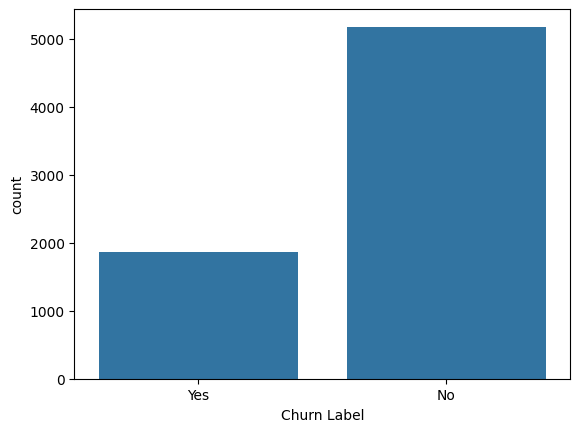

In [8]:
# Basic info
df.info()

# Check for missing values
df.isnull().sum()

# Summary statistics
df.describe()

# Check churn distribution
sns.countplot(x='Churn Label', data=df)
plt.show()


In [9]:
# Convert 'TotalCharges' to numeric (some values may be spaces)
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

# Fill missing values in 'TotalCharges' (if any)
df['Total Charges'].fillna(df['Total Charges'].median(), inplace=True)

# Drop customerID (not useful)
df.drop('CustomerID', axis=1, inplace=True)

# Encode target variable 'Churn' (Yes=1, No=0)
df['Churn Label'] = df['Churn Label'].map({'Yes':1, 'No':0})

# Encode categorical features
cat_cols = df.select_dtypes(include=['object']).columns

# Use get_dummies for categorical variables
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)




In [10]:
X = df.drop('Churn Label', axis=1)
y = df['Churn Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [11]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Decision Tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

Logistic Regression Accuracy: 0.9027679205110007
Decision Tree Accuracy: 1.0
Logistic Regression ROC-AUC: 0.9689297062698597
Decision Tree ROC-AUC: 1.0
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93      1035
           1       0.80      0.84      0.82       374

    accuracy                           0.90      1409
   macro avg       0.87      0.88      0.88      1409
weighted avg       0.90      0.90      0.90      1409



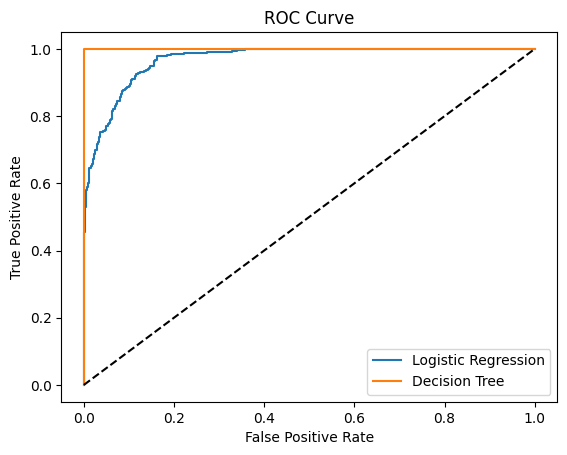

In [12]:
# Predict probabilities for ROC AUC
y_pred_logreg = logreg.predict(X_test)
y_prob_logreg = logreg.predict_proba(X_test)[:, 1]

y_pred_dtree = dtree.predict(X_test)
y_prob_dtree = dtree.predict_proba(X_test)[:, 1]

# Accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dtree))

# ROC-AUC
print("Logistic Regression ROC-AUC:", roc_auc_score(y_test, y_prob_logreg))
print("Decision Tree ROC-AUC:", roc_auc_score(y_test, y_prob_dtree))

# Confusion Matrix and Classification Report for Logistic Regression
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_logreg)
plt.plot(fpr, tpr, label='Logistic Regression')
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_prob_dtree)
plt.plot(fpr2, tpr2, label='Decision Tree')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


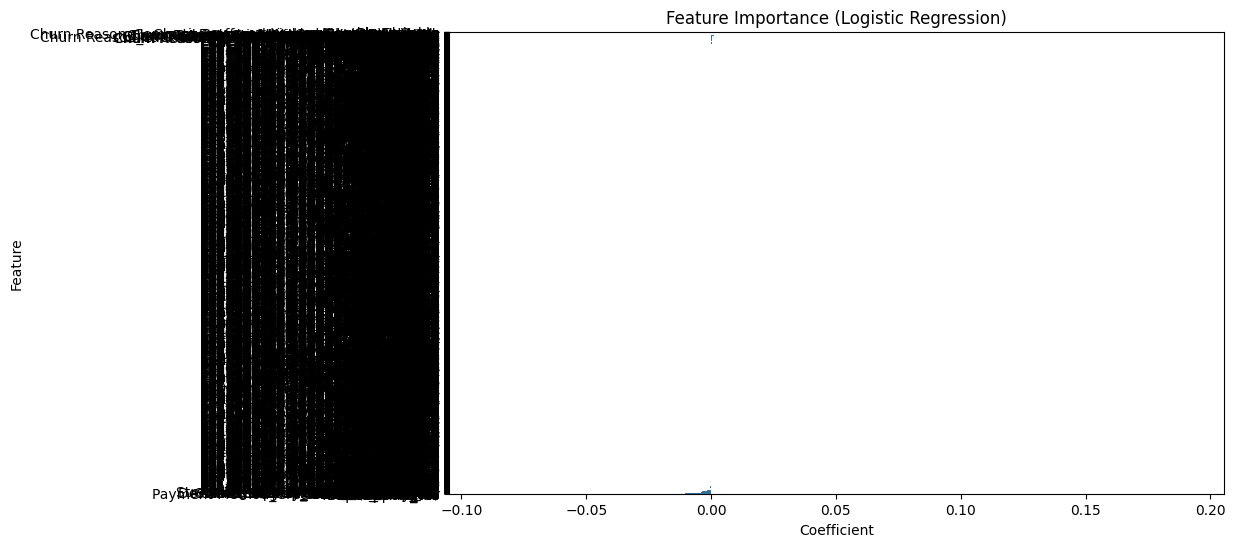

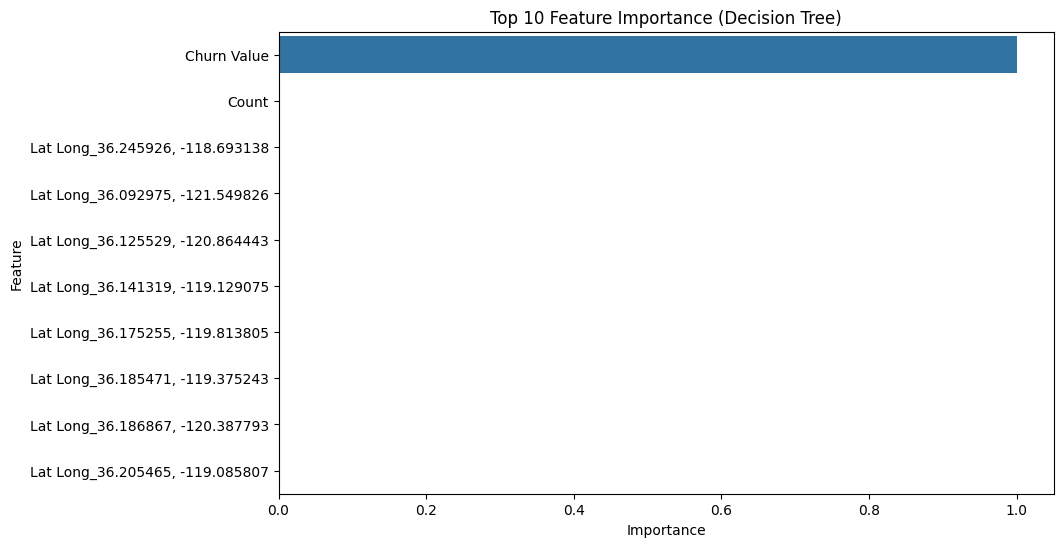

In [13]:
# Logistic Regression coefficients
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': logreg.coef_[0]})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Feature Importance (Logistic Regression)')
plt.show()

# Decision Tree feature importance
feat_imp = pd.DataFrame({'Feature': X.columns, 'Importance': dtree.feature_importances_})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title('Top 10 Feature Importance (Decision Tree)')
plt.show()


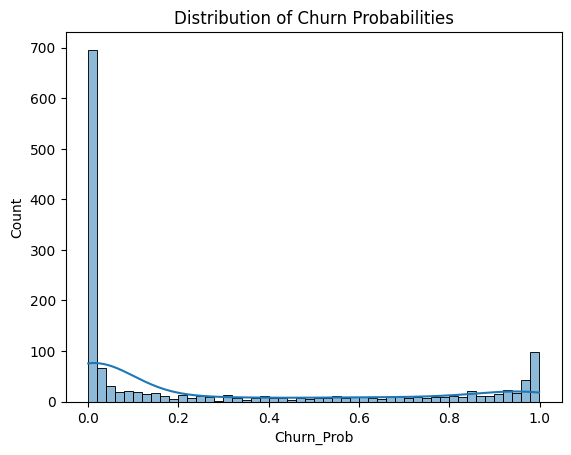

In [14]:
# Add churn probability predictions to test set
test_results = X_test.copy()
test_results['Churn_Prob'] = y_prob_logreg
test_results['Actual_Churn'] = y_test.values

# Visualize churn probabilities
sns.histplot(test_results['Churn_Prob'], bins=50, kde=True)
plt.title('Distribution of Churn Probabilities')
plt.show()


In [15]:
from joblib import dump, load

# Save the model
dump(logreg, 'logistic_regression_model.joblib')

# Later, load the model
loaded_model = load('logistic_regression_model.joblib')

# Use loaded model to predict
predictions = loaded_model.predict(X_test)
